In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1 = pd.read_csv("df_final_web_data_pt_1.txt")
df2 = pd.read_csv("df_final_web_data_pt_2.txt")

In [4]:
df_demo = pd.read_csv("df_final_demo.txt")
df_experiment = pd.read_csv("df_final_experiment_clients.txt")

In [5]:
df_web = pd.concat ([df1, df2], ignore_index=True, axis=0)

In [6]:
df_demo.drop(columns=['clnt_tenure_yr'], inplace=True)

In [7]:
df_demo['tenure_years'] = (df_demo['clnt_tenure_mnth'].fillna(0) // 12).astype(int)
df_demo['tenure_months_resto'] = (df_demo['clnt_tenure_mnth'].fillna(0) % 12).astype(int)

In [8]:
#creamos el nuevo orden deseado
cols = df_demo.columns.tolist()

# Eliminamos las columnas que vamos a reubicar
cols.remove('tenure_years')
cols.remove('tenure_months_resto')

# Insertamos las nuevas columnas en la posición deseada
cols.insert(2, 'tenure_years')          
cols.insert(3, 'tenure_months_resto')   

df_demo = df_demo[cols]

In [39]:
#rellenamos nulos
df_demo['clnt_age'] = df_demo['clnt_age'].fillna(0)
df_demo['num_accts'] = df_demo['num_accts'].fillna(0)
df_demo['calls_6_mnth'] = df_demo['calls_6_mnth'].fillna(0)
df_demo['logons_6_mnth'] = df_demo['logons_6_mnth'].fillna(0)
df_demo['bal'] = df_demo['bal'].fillna(0)  

In [10]:
#convertimos a enteros
df_demo['clnt_age'] = df_demo['clnt_age'].astype(int)
df_demo['num_accts'] = df_demo['num_accts'].astype(int)
df_demo['calls_6_mnth'] = df_demo['calls_6_mnth'].astype(int)
df_demo['logons_6_mnth'] = df_demo['logons_6_mnth'].astype(int)

In [11]:
#redondeamos la columna bal a dos decimales
df_demo['bal'] = df_demo['bal'].round(2)

In [12]:
df_demo['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [13]:
#ordenamos por logons
top_clientes_online = df_demo.sort_values(by='logons_6_mnth', ascending=False)

In [14]:
top_clientes_online[['client_id', 'logons_6_mnth', 'clnt_age', 'clnt_tenure_mnth']].head(10)

,client_id,logons_6_mnth,clnt_age,clnt_tenure_mnth
0,836976,9,60,73.0
50496,6967120,9,68,260.0
24,9520009,9,30,160.0
1,2304905,9,58,94.0
2,1439522,9,32,64.0
50495,1780858,9,68,262.0
17153,7114816,9,55,106.0
17162,5777311,9,47,286.0
17201,2532415,9,67,76.0
17207,1399011,9,57,100.0


In [15]:
top_clientes_online = df_demo.sort_values(by=['logons_6_mnth', 'bal'], ascending=[False, False])

In [16]:
top_clientes_online[['client_id', 'logons_6_mnth', 'bal', 'clnt_age', 'clnt_tenure_mnth']].head(10)

,client_id,logons_6_mnth,bal,clnt_age,clnt_tenure_mnth
39367,9286288,9,16320040.15,62,254.0
23849,7070097,9,8986419.77,53,133.0
13318,9440656,9,8292996.21,63,94.0
20871,1678193,9,8137343.24,65,299.0
31811,6762377,9,8045102.60,41,193.0
14057,3519657,9,7741994.01,66,218.0
21184,987970,9,7339443.17,74,179.0
33222,857273,9,6716305.28,56,376.0
49388,5735570,9,6000386.82,73,451.0
36379,3545814,9,5754204.68,59,163.0


<Axes: xlabel='clnt_age', ylabel='Count'>

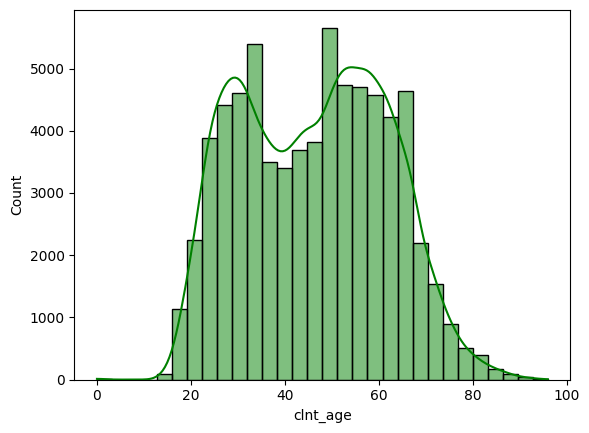

In [17]:
sns.histplot(df_demo['clnt_age'], kde=True, bins=30, color="green")

In [21]:
df_demo.columns

Index(['client_id', 'clnt_tenure_mnth', 'tenure_years', 'tenure_months_resto',
       'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth'],
      dtype='object')

C:\Users\BMENDI\AppData\Local\Temp\ipykernel_12632\3696678643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_años.index, y=conteo_años.values, palette="Set3")


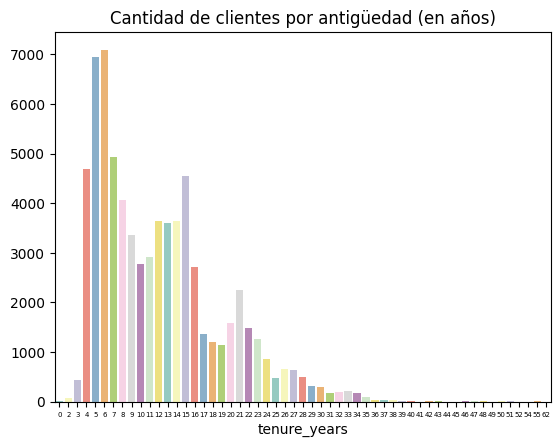

In [32]:
df_demo['tenure_years'] = (df_demo['clnt_tenure_mnth'].fillna(0) // 12).astype(int)
conteo_años = df_demo['tenure_years'].value_counts().sort_index()
sns.barplot(x=conteo_años.index, y=conteo_años.values, palette="Set3")
plt.title("Cantidad de clientes por antigüedad (en años)")
plt.xticks(fontsize=5)
plt.show()

<Axes: xlabel='clnt_age', ylabel='Count'>

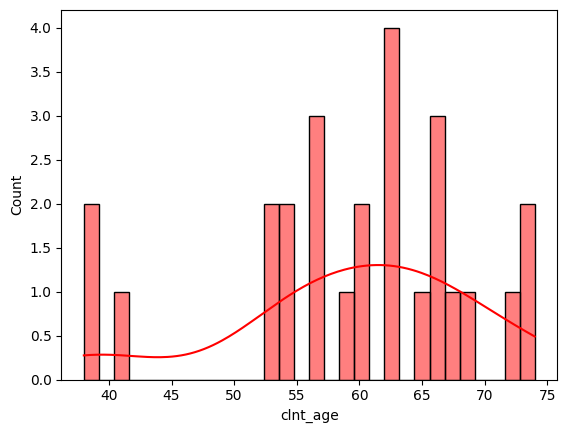

In [ ]:
# Filtrar solo los clientes con 9 logons y mas de 4000000 de bal
df_filtrado = df_demo[(df_demo['logons_6_mnth'] == 9) & (df_demo['bal'] > 4_000_000)]

# Histograma de la edad de esos clientes
sns.histplot(df_filtrado['clnt_age'], kde=True, bins=30, color="red")

<Axes: xlabel='clnt_age', ylabel='Count'>

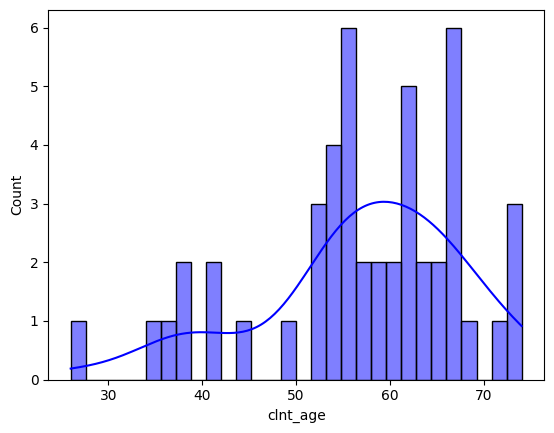

In [48]:
# Filtrar solo los clientes con 9 logons y mas de 4000000 de bal
df_filtrado = df_demo[(df_demo['bal'] > 4_000_000)]

# Histograma de la edad de esos clientes
sns.histplot(df_filtrado['clnt_age'], kde=True, bins=30, color="blue")

In [50]:
grupos = ['Baja inversión', 'Media inversión', 'Alta inversión', 'Muy alta inversión']
df_top_4_quintiles = df_demo[df_demo['rango_inversion'].isin(grupos)]

In [51]:
total_logons = df_top_4_quintiles['logons_6_mnth'].sum()
print("Total de logins (últimos 4 quintiles):", total_logons)

Total de logins (últimos 4 quintiles): 691


In [52]:
logins_por_frecuencia = df_top_4_quintiles['logons_6_mnth'].value_counts().sort_index()
print(logins_por_frecuencia)

logons_6_mnth
2     1
3     2
4     5
5     5
6     5
7    18
8    13
9    42
Name: count, dtype: int64


C:\Users\BMENDI\AppData\Local\Temp\ipykernel_12632\3679936153.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logins_por_frecuencia.index, y=logins_por_frecuencia.values, palette="Set3")


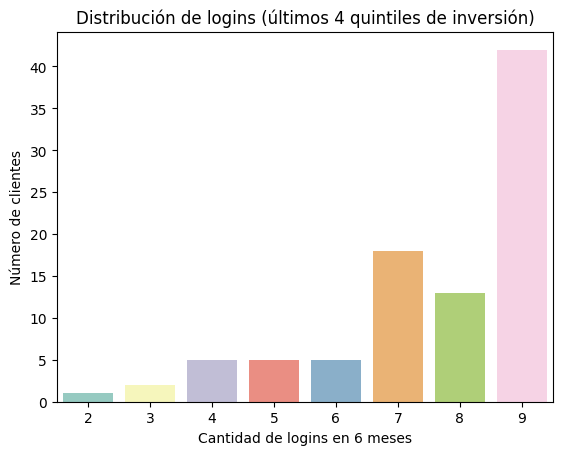

In [53]:
sns.barplot(x=logins_por_frecuencia.index, y=logins_por_frecuencia.values, palette="Set3")
plt.title("Distribución de logins (últimos 4 quintiles de inversión)")
plt.xlabel("Cantidad de logins en 6 meses")
plt.ylabel("Número de clientes")
plt.show()

In [42]:
labels = ['Muy baja inversión', 'Baja inversión', 'Media inversión', 'Alta inversión', 'Muy alta inversión']

df_demo['rango_inversion'] = pd.cut(df_demo['bal'], bins=5, labels=labels)

In [43]:
conteo_rangos = df_demo['rango_inversion'].value_counts().sort_index()

In [49]:
corte = pd.cut(df_demo['bal'], bins=5)

# Ver los intervalos exactos
print(corte.cat.categories)

IntervalIndex([   (-16320.04, 3264008.03],   (3264008.03, 6528016.06],
                 (6528016.06, 9792024.09],  (9792024.09, 13056032.12],
               (13056032.12, 16320040.15]],
              dtype='interval[float64, right]')


In [44]:
print(conteo_rangos)

rango_inversion
Muy baja inversión    70518
Baja inversión           79
Media inversión          10
Alta inversión            1
Muy alta inversión        1
Name: count, dtype: int64


C:\Users\BMENDI\AppData\Local\Temp\ipykernel_12632\2527631672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")


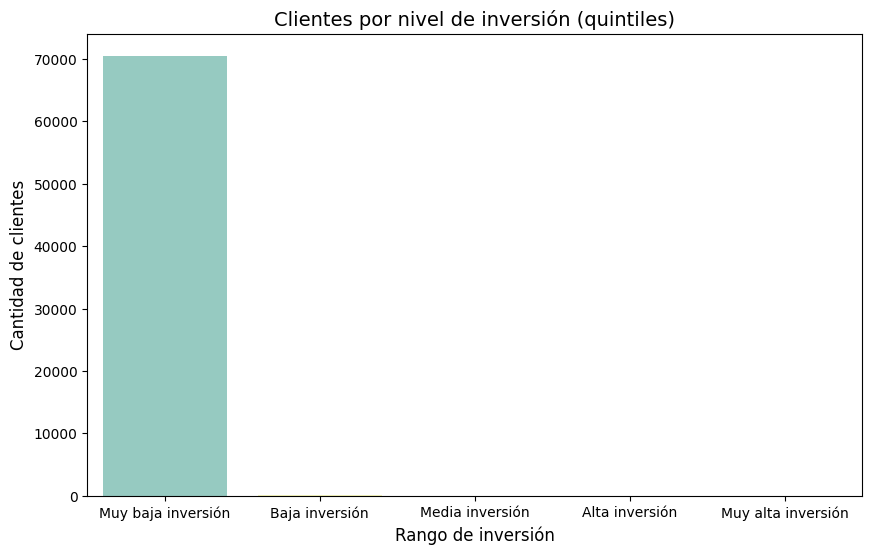

In [45]:
plt.figure(figsize=(10, 6))

sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")

plt.title("Clientes por nivel de inversión (quintiles)", fontsize=14)
plt.xlabel("Rango de inversión", fontsize=12)
plt.ylabel("Cantidad de clientes", fontsize=12)

plt.show()